In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# import os
# import cv2


# DATADIR = "data/training_data"
# CATEGORIES = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "Q", "W", "E", "R", "T", "Y", "U", "I", "O", "P", "A", "S", "D", "F", "G", "H", "J", "K", "L", "Z", "X", "C", "V", "B", "N", "M"]


# for category in CATEGORIES:
#     path = os.path.join(DATADIR, category)
#     for img in os.listdir(path):
#         img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
#         plt.imshow(img_array, cmap="gray")
#         plt.show()
#         break
#     break

In [2]:
# print(img_array.shape)

In [3]:
# training_data = []

# def create_training_data():
#     for category in CATEGORIES:
#         path = os.path.join(DATADIR, category)
#         for img in os.listdir(path):
#             img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)


# create_training_data()

In [4]:
# print(len(training_data))

In [5]:
import numpy as np
import pandas as pd
import os

In [6]:
os.chdir("data")

In [7]:
import tensorflow as tf
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import cv2

In [8]:
import matplotlib.pyplot as plt
def plot_images(images_arr, imageWidth, imageHeight):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img.reshape(imageWidth, imageHeight), cmap="gray")
        ax.axis("off")
    plt.tight_layout()
    plt.show()

In [9]:
batch_size = 32
epochs = 50
IMG_HEIGHT = 28
IMG_WIDTH = 28

In [10]:
def preprocessing_fun(img):
#     print(img.shape)
#     print(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY, CV_8UC1)
    img = cv2.GaussianBlur(img,(3,3),0)
    img = img.reshape((28,28,1))
    thresh = cv2.adaptiveThreshold(img, 255, 1, 1, 11, 2)
    print(thresh.shape)

In [11]:
augmented_image_gen = ImageDataGenerator(
        rescale = 1/255.0,
    rotation_range=2,
    width_shift_range=.1,
    height_shift_range=.1,
    zoom_range=0.1,
    shear_range=2,
    brightness_range=[0.9, 1.1],
    validation_split=0.2,
   
   )

normal_image_gen = ImageDataGenerator(
    rescale = 1/255.0,
    validation_split=0.2,
  
   )

In [12]:
train_data_gen = augmented_image_gen.flow_from_directory(batch_size=batch_size,
                                                     directory="./training_data",
                                                     color_mode="grayscale",
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode="categorical",
                                                     seed=65657867,
                                                     subset='training')
val_data_gen = normal_image_gen.flow_from_directory(batch_size=batch_size,
                                                     directory="./testing_data",
                                                     color_mode="grayscale",
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode="categorical",
                                                     seed=65657867,
                                                     subset='validation')

Found 16524 images belonging to 36 classes.
Found 180 images belonging to 36 classes.


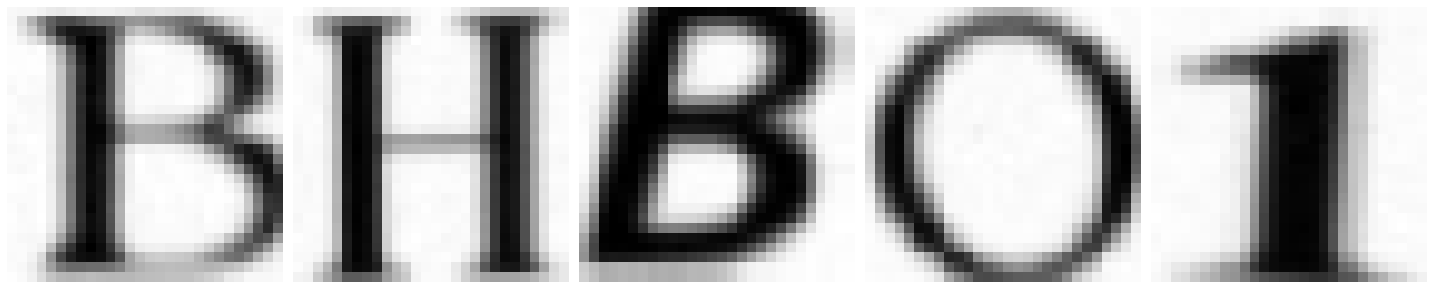

In [13]:
sample_training_images, _ = next(train_data_gen)

In [14]:
from tensorflow.keras.optimizers import SGD
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(36, activation='softmax'))
    return model

In [15]:
model = define_model()

In [16]:
import tensorflow
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint, ReduceLROnPlateau
#Prepare call backs
EarlyStop_callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
checkpoint = ModelCheckpoint('',
                             monitor = 'val_loss',mode = 'min',save_best_only= True)
lr = ReduceLROnPlateau(monitor = 'val_loss',factor = 0.5,patience = 3,min_lr = 0.00001)
my_callback=[EarlyStop_callback,checkpoint]

In [17]:
model.compile(optimizer=SGD(lr=0.01, momentum=0.9),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['categorical_accuracy'])

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // batch_size,
    epochs=1,
    validation_data=val_data_gen,
    validation_steps=val_data_gen.samples // batch_size,
    callbacks = my_callback)

C:\Users\Soumya\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
<ipython-input-17-ad4fac435d0c>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


516/516 [==============================] - ETA: 0s - loss: 1.8440 - categorical_accuracy: 0.4649

INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


516/516 [==============================] - 15s 29ms/step - loss: 1.8440 - categorical_accuracy: 0.4649 - val_loss: 0.4018 - val_categorical_accuracy: 0.8813


In [18]:
normal_image_gen = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True
)
test_data_gen = normal_image_gen.flow_from_directory(batch_size=5193,
                                                     directory="./testing_data",
                                                     color_mode="grayscale",
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode="categorical")

Found 1008 images belonging to 36 classes.


In [19]:
from PIL import Image
test_images, test_labels = next(test_data_gen)
filenames = test_data_gen.filenames
test_pred = model.predict(test_images)
true_labels = tf.argmax(test_labels,1)
predicted_labels = tf.argmax(test_pred,1)

32/32 [==============================] - 0s 4ms/step


In [20]:
import sklearn
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(true_labels, predicted_labels)

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 14,  0, ...,  1,  3,  0],
       [ 0,  0, 17, ...,  0,  0,  8],
       ...,
       [ 0,  0,  0, ..., 28,  0,  0],
       [ 0,  0,  0, ...,  0, 28,  0],
       [ 0,  0,  0, ...,  0,  3, 25]], dtype=int64)

In [21]:
img = cv2.imread('testing_data/N/28333.png',0)
img = img/255
img = cv2.resize(img, (28,28))
img = img.reshape((1,28,28,1))

In [34]:
tf.argmax(model.predict(img),1)

1/1 [==============================] - 0s 20ms/step


InvalidArgumentError: {{function_node __wrapped__ArgMax_device_/job:localhost/replica:0/task:0/device:CPU:0}} Expected dimension in the range [-2, 2), but got 109 [Op:ArgMax]

In [23]:
model.save('ocr.model')

INFO:tensorflow:Assets written to: ocr.model\assets


INFO:tensorflow:Assets written to: ocr.model\assets


In [24]:
new_model = tf.keras.models.load_model('ocr.model')

In [25]:
predictions = new_model.predict(img)

1/1 [==============================] - 0s 47ms/step


In [26]:
print(predictions)

[[1.4162043e-09 6.6157918e-07 1.7171391e-11 7.0436693e-07 1.7715838e-06
  1.4160769e-06 7.1152371e-08 6.9506214e-09 1.5180563e-05 1.6382231e-05
  6.2867675e-06 2.3977636e-05 3.3702909e-11 2.1313022e-08 8.9205463e-07
  2.0564694e-06 3.1889726e-08 4.2315801e-03 1.6490008e-09 2.4970674e-09
  2.3450413e-04 1.3153408e-08 4.7159214e-03 9.8882347e-01 1.3438239e-08
  8.2550912e-07 3.0315340e-07 6.3277211e-04 4.2786520e-05 1.0072684e-09
  1.6611049e-04 2.9763757e-04 1.7930774e-04 1.6690015e-04 4.3845287e-04
  3.8062082e-09]]


In [35]:
print(np.argmax(predictions[img]))

IndexError: arrays used as indices must be of integer (or boolean) type

1/1 [==============================] - 0s 18ms/step


TypeError: Invalid shape (1,) for image data

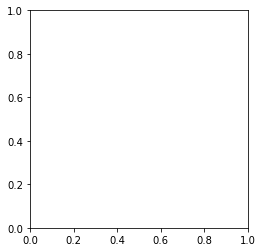

In [30]:
plt.imshow(img)
plt.show